In [ ]:
# Implementing Feedforward neural networks with Keras and TensorFlow
# a. Import the necessary packages
# b. Load the training and testing data (CIFAR10)
# c. Define the network architecture using Keras
# d. Train the model using SGD
# e. Evaluate the network
# f. Plot the training loss and accuracy

In [45]:
# a. Import the necessary packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [46]:
# b. Load the training and testing data (CIFAR10)
train_data_dir = 'C:/Users/Acer/Downloads/dataset/cifar-10-img/train'
test_data_dir = 'C:/Users/Acer/Downloads/dataset/cifar-10-img/test'

# Image data generator for training data
train_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Image data generator for testing data
test_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Create data generators
train_batch_size = 20000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(32, 32),  # Resize images to 32x32
    batch_size=train_batch_size,
    class_mode='sparse', 
    shuffle=True,
)

# Load test data without labels (class_mode=None)
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(32, 32),  # Resize images to 32x32
    batch_size=test_batch_size,
    class_mode='sparse', 
    shuffle=True,
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [47]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

x_train[0].shape

(32, 32, 3)

In [48]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [49]:
# c. Define the network architecture using Keras

model = keras.Sequential([
    keras.layers.Conv2D(28, kernel_size = (3, 3), input_shape = (32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dropout((0.5)),
    keras.layers.Dense(10, activation = 'softmax')
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 28)        784       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 28)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6300)              0         
                                                                 
 dense_6 (Dense)             (None, 300)               1890300   
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                3010      
                                                      

# d. Train the model using SGD


In [50]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
625/625 [==============================] - 19s 29ms/step - loss: 2.0324 - accuracy: 0.2655 - val_loss: 1.8398 - val_accuracy: 0.3750
Epoch 2/5
625/625 [==============================] - 18s 28ms/step - loss: 1.8121 - accuracy: 0.3611 - val_loss: 1.7592 - val_accuracy: 0.3690
Epoch 3/5
625/625 [==============================] - 17s 28ms/step - loss: 1.7055 - accuracy: 0.3995 - val_loss: 1.6314 - val_accuracy: 0.4340
Epoch 4/5
625/625 [==============================] - 18s 29ms/step - loss: 1.6294 - accuracy: 0.4290 - val_loss: 1.5725 - val_accuracy: 0.4530
Epoch 5/5
625/625 [==============================] - 19s 31ms/step - loss: 1.5660 - accuracy: 0.4516 - val_loss: 1.5082 - val_accuracy: 0.4740


In [51]:
# e. Evaluate the network

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

32/32 [==============================] - 0s 10ms/step - loss: 1.5082 - accuracy: 0.4740
Loss:  1.5081794261932373
Accuracy:  0.4740000069141388


In [52]:

y = to_categorical(y_test)
predicted_value = model.predict(x_test)

32/32 [==============================] - 0s 8ms/step


In [53]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Actual Number:  deer
Predicted Number:  deer


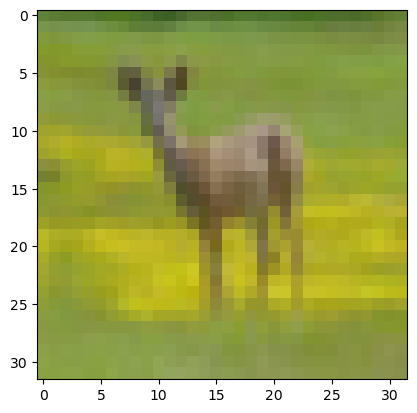

In [57]:
n = 24
plt.imshow(x_test[n])
print("Actual : ",labels[np.argmax(y[n])])
print("Predicted: ", labels[np.argmax(predicted_value[n])])

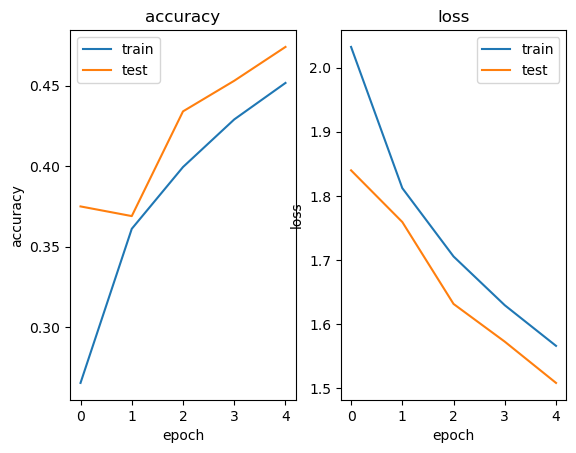

In [55]:
# f. Plot the training loss and accuracy
plt.figure()

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])